

# İRİS VERİ SETİNDE DERİN ÖĞRENME İLE EĞİTME İŞLEMİ

Epoch 0, Loss: 6.187401798471636
Epoch 100, Loss: 0.8338596875773544
Epoch 200, Loss: 0.27862001496417965
Epoch 300, Loss: 0.22254103885344864
Epoch 400, Loss: 0.19279879159322735
Epoch 500, Loss: 0.17210020231283255
Epoch 600, Loss: 0.15687699343127157
Epoch 700, Loss: 0.14547661424090105
Epoch 800, Loss: 0.13661790147697578
Epoch 900, Loss: 0.12957082235914977
Test Accuracy: 93.33%


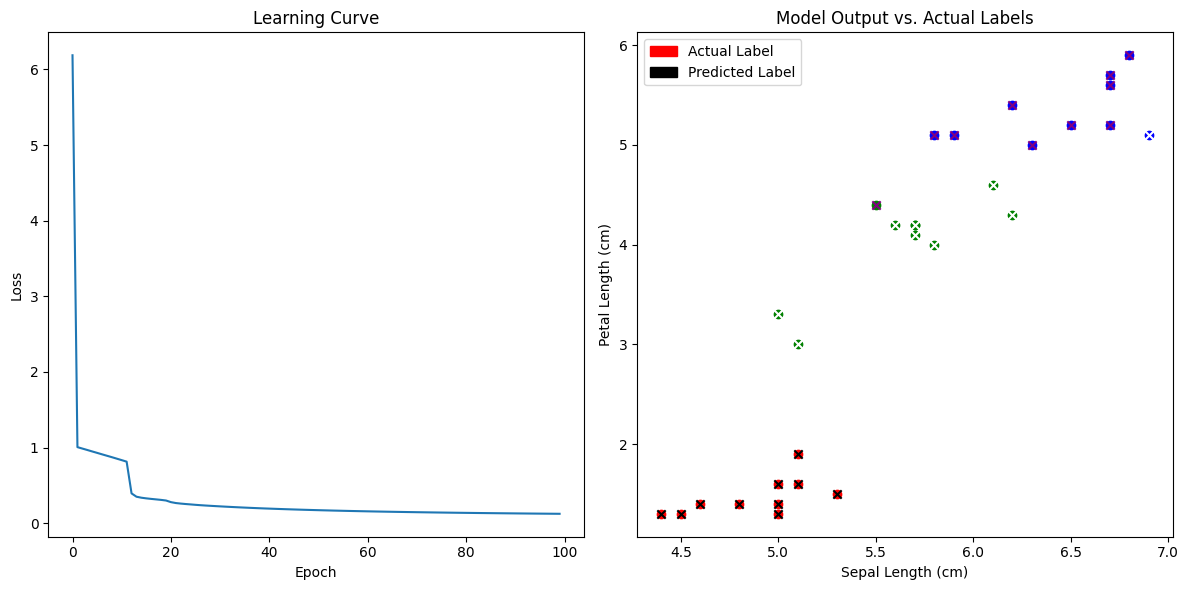

In [18]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches

# Downloading data
traindata = np.loadtxt('trainiris.txt', delimiter=',', dtype={'names': ('sepal_length', 'sepal_width', 'petal_length', 'petal_width', 'species'),
                                                        'formats': ('f4', 'f4', 'f4', 'f4', 'U15')})

testdata = np.loadtxt('testiris.txt', delimiter=',', dtype={'names': ('sepal_length', 'sepal_width', 'petal_length', 'petal_width', 'species'),
                                                        'formats': ('f4', 'f4', 'f4', 'f4', 'U15')})


# Separating data to labels and values
trainx = np.array([list(row)[:-1] for row in traindata])  # Train Values
trainy = np.array([row[-1] for row in traindata])  # Train Labels
testx = np.array([list(row)[:-1] for row in testdata])  # Test Values
testy = np.array([list(row)[-1] for row in testdata])  # Test Labels

# Setting variables
input_size = 4
hidden_size1 = 4
hidden_size2 = 4
output_size = 3

# Setting weights and biases
w1 = np.random.randn(input_size, hidden_size1)
w2 = np.random.randn(hidden_size1, hidden_size2)
w3 = np.random.randn(hidden_size2, output_size)

b1 = np.zeros((1, hidden_size1))
b2 = np.zeros((1, hidden_size2))
b3 = np.zeros((1, output_size))

# For a numerical representation of labels we declaring a function
def one_hot_encode(labels):
    label_map = {'Iris-setosa': 0, 'Iris-versicolor': 1, 'Iris-virginica': 2}
    encoded = np.zeros((len(labels), 3))
    for idx, label in enumerate(labels):
        encoded[idx, label_map[label]] = 1
    return encoded

# Creating new arrays as numerical representation of labels
trainy_encoded = one_hot_encode(trainy)
testy_encoded = one_hot_encode(testy)

# Defining activation functions
def sigmoid(x):
    return 1 / (1 + np.exp(-x))

def softmax(x):
    e_x = np.exp(x - np.max(x, axis=1, keepdims=True))
    return e_x / np.sum(e_x, axis=1, keepdims=True)

def relu(x):
    return np.maximum(0, x)

def relu_derivative(x):
    return np.where(x > 0, 1, 0)

# Defining forward propagation
def forward(x):
    global w1, w2, w3, b1, b2, b3
    z1 = np.dot(x, w1) + b1
    a1 = relu(z1)
    z2 = np.dot(a1, w2) + b2
    a2 = relu(z2)
    z3 = np.dot(a2, w3) + b3
    a3 = softmax(z3)
    return z1, a1, z2, a2, z3, a3

# Defining backward propagation
def backprop(x, y, lr):
    global w1, w2, w3, b1, b2, b3
    z1, a1, z2, a2, z3, a3 = forward(x)

    m = y.shape[0]

    dz3 = a3 - y
    dw3 = np.dot(a2.T, dz3) / m
    db3 = np.sum(dz3, axis=0, keepdims=True) / m

    dz2 = np.dot(dz3, w3.T) * relu_derivative(a2)
    dw2 = np.dot(a1.T, dz2) / m
    db2 = np.sum(dz2, axis=0, keepdims=True) / m

    dz1 = np.dot(dz2, w2.T) * relu_derivative(a1)
    dw1 = np.dot(x.T, dz1) / m
    db1 = np.sum(dz1, axis=0) / m

    w3 -= lr * dw3
    b3 -= lr * db3
    w2 -= lr * dw2
    b2 -= lr * db2
    w1 -= lr * dw1
    b1 -= lr * db1

# Train function
def train(x, y, lr, epochs):
    global w1, w2, w3, b1, b2, b3
    loss_history = []
    for i in range(epochs):
        for x_i, y_i in zip(x, y):
            x_i = x_i.reshape(1, -1)
            y_i = y_i.reshape(1, -1)
            backprop(x_i, y_i, lr)

        if i % 10 == 0:
            _, _, _, _, _, a3 = forward(x)
            loss = -np.mean(np.sum(y * np.log(a3 + 1e-8), axis=1))
            loss_history.append(loss)
            if i % 100 == 0:
                print(f'Epoch {i}, Loss: {loss}')
    return loss_history
# Starting the model
loss_history = train(trainx, trainy_encoded, 0.0001, 1000)

# Testing the model
_, _, _, _, _, predictions = forward(testx)
predictions = np.argmax(predictions, axis=1)
testy_labels = np.argmax(testy_encoded, axis=1)

accuracy = np.mean(predictions == testy_labels)
print(f'Test Accuracy: {accuracy * 100:.2f}%')

# Creating a figure with two subplots
fig, axs = plt.subplots(1, 2, figsize=(12, 6))

# Plotting the loss curve on the first subplot
axs[0].plot(loss_history)
axs[0].set_xlabel('Epoch')
axs[0].set_ylabel('Loss')
axs[0].set_title('Learning Curve')

# Visualizing the test results on the second subplot
colors = {
    0: 'red',
    1: 'green',
    2: 'blue'
}
colorss = {
    0: 'black',
    1: 'white',
    2: 'purple'
}

for i in range(len(testx)):
    axs[1].scatter(testx[i][0], testx[i][2], c=colors[testy_labels[i]])
    axs[1].scatter(testx[i][0], testx[i][2], c=colorss[predictions[i]], marker='x')

axs[1].set_xlabel('Sepal Length (cm)')
axs[1].set_ylabel('Petal Length (cm)')
axs[1].set_title('Model Output vs. Actual Labels')

actual_label_patch = mpatches.Patch(color='red', label='Actual Label')
predicted_label_patch = mpatches.Patch(color='black', label='Predicted Label')
axs[1].legend(handles=[actual_label_patch, predicted_label_patch])

# Adjust layout to prevent overlap
plt.tight_layout()
plt.show()


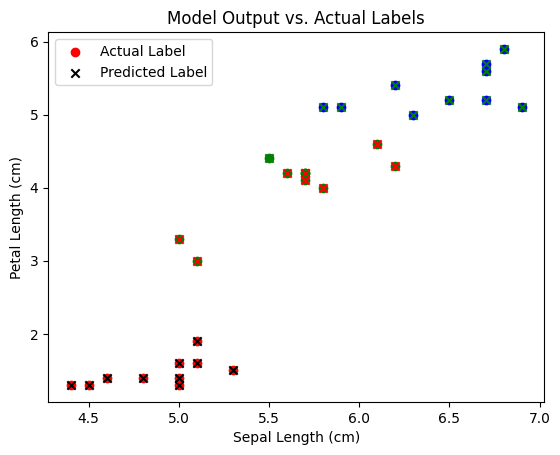

In [ ]:
_, _, _, _, _, predictions = forward(testx)
predictions = np.argmax(predictions, axis=1)

colors = {
    0: 'red',
    1: 'green',
    2: 'blue'
}

colorss = {
    0: 'black',
    1: 'red',
    2: 'green'
}

for i in range(len(testx)):
    plt.scatter(testx[i][0], testx[i][2], c=colors[testy_labels[i]])
    plt.scatter(testx[i][0], testx[i][2], c=colorss[predictions[i]], marker='x')

plt.xlabel('Sepal Length (cm)')
plt.ylabel('Petal Length (cm)')
plt.title('Model Output vs. Actual Labels')
plt.legend(['Actual Label', 'Predicted Label'])
plt.show()
